# 📉 **Cálculo del Value at Risk (VaR) en Python**  

## Introducción  
Este análisis es ofrecido por el **Semillero de Investigación ANIF**, con el objetivo de desarrollar herramientas para la gestión de riesgos financieros y toma de decisiones en inversiones.  

El **Value at Risk (VaR)** es una medida estadística clave en la administración de riesgos, utilizada para estimar la pérdida máxima esperada de un portafolio de inversión en un horizonte de tiempo determinado con un nivel de confianza específico.  

## Métodos de Cálculo  
Existen varios enfoques para calcular el VaR:  
1. **Método Histórico**: Basado en datos pasados de rendimientos.  
2. **Varianza-Covarianza (Paramétrico)**: Asume una distribución normal de rendimientos.  
3. **Simulación de Monte Carlo**: Genera múltiples escenarios aleatorios para estimar pérdidas futuras.  

En este proyecto, exploraremos estos métodos con herramientas de **Python** para evaluar el riesgo de una cartera de inversión.  



## 📚 Librerías necesarias  
Antes de comenzar, asegúrate de instalar las siguientes librerías:  

```python
pip install numpy pandas matplotlib scipy yfinance


In [ ]:

#Librerias
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from tabulate import tabulate
import seaborn as sns
from scipy.stats import norm


# **Método Histórico** 📈
  
Nuestro objetivo es calcular el **VaR de un portafolio de inversión** a partir de datos históricos. Para ello, realizaremos los siguientes pasos:  

1. Obtener datos históricos de activos financieros.  
2. Calcular los rendimientos logarítmicos.
3. Asignar pesos a cada activo en la cartera.
4. Implementar los métodos de cálculo del VaR.
5. Visualizar los resultados mediante gráficos.

📌 **Este análisis busca proporcionar herramientas para la toma de decisiones en gestión de inversiones y evaluación de riesgos financieros.**  

¡Comencemos! 🚀  




[Fuente del código](https://ryanoconnellfinance.com/value-at-risk-analysis-using-python/)



## 📌 Paso 1: Obtener datos históricos de activos financieros  

El primer paso en nuestro cálculo del **VaR** es recopilar datos históricos de los activos que conforman el portafolio. Estos datos suelen incluir los precios de cierre ajustados de cada activo en un período determinado.  

Para ello, podemos utilizar fuentes como:  
- **Yahoo Finance** 📈  
- **Google Finance** 📊  
- **APIs de datos financieros** 🔗  

Disponer de una serie de precios históricos nos permitirá calcular los rendimientos y analizar la volatilidad del portafolio.  

🔍 **Objetivo**: Obtener un dataset confiable con el historial de precios necesario para el análisis de riesgo.

In [ ]:

# 🔹 Permitir que el usuario ingrese la fecha final manualmente (opcional)
fecha_final_input = input("Ingrese la fecha final (YYYY-MM-DD) o presione Enter para usar la actual: ")

if fecha_final_input:
    try:
        endDate = dt.datetime.strptime(fecha_final_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    endDate = dt.datetime.now()

# 🔹 Permitir que el usuario ingrese la fecha de inicio o el número de años
fecha_inicio_input = input("Ingrese la fecha de inicio (YYYY-MM-DD) o presione Enter para calcular desde años atrás: ")

if fecha_inicio_input:
    try:
        startDate = dt.datetime.strptime(fecha_inicio_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    # Si el usuario no proporciona una fecha de inicio, restamos "years"
    years = int(input("Ingrese el número de años de datos históricos: ") or 15)
    if years <= 0:
        raise ValueError("El número de años debe ser mayor que 0.")
    startDate = endDate - relativedelta(years=years)

# 🔹 Lista de tickers a analizar (se puede modificar)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# 🔹 Mostrar información
print(f"\n🔹 Obteniendo datos desde {startDate.date()} hasta {endDate.date()}.")
print(f"🔹 Tickers seleccionados: {', '.join(tickers)}")


🔹 Obteniendo datos desde 2010-04-08 hasta 2025-04-08.
🔹 Tickers seleccionados: SPY, BND, GLD, QQQ, VTI


In [ ]:
# Descargar datos de los tickers seleccionados
data = yf.download(tickers, start=startDate, end=endDate)

# 🔍 Imprimir las columnas disponibles
#print("Columnas disponibles:", data.columns)

# Extraer los datos de cierre correctamente desde MultiIndex
adj_close_df = data.xs('Close', level=0, axis=1)  # Obtiene solo los valores de 'Close'

# Manejo de valores faltantes (sin warning)
adj_close_df = adj_close_df.ffill().dropna()

# Mostrar resultado
#print(adj_close_df.head())

# Imprimir los primeros 10 registros en formato tabular
print(tabulate(adj_close_df.head(10), headers="keys", tablefmt="fancy_grid"))

[*********************100%***********************]  5 of 5 completed

╒═════════════════════╤═════════╤════════╤═════════╤═════════╤═════════╕
│ Date                │     BND │    GLD │     QQQ │     SPY │     VTI │
╞═════════════════════╪═════════╪════════╪═════════╪═════════╪═════════╡
│ 2010-04-08 00:00:00 │ 51.301  │ 112.65 │ 42.5546 │ 90.2556 │ 46.2722 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-09 00:00:00 │ 51.3987 │ 113.64 │ 42.8078 │ 90.8483 │ 46.5853 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-12 00:00:00 │ 51.4508 │ 113.01 │ 42.8427 │ 90.9927 │ 46.6922 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-13 00:00:00 │ 51.555  │ 112.69 │ 43.061  │ 91.0611 │ 46.738  │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-14 00:00:00 │ 51.5159 │ 113.03 │ 43.5761 │ 92.0946 │ 47.3108 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-15 00:00:00 │ 51.5941 │ 113.65 │ 43.7682 

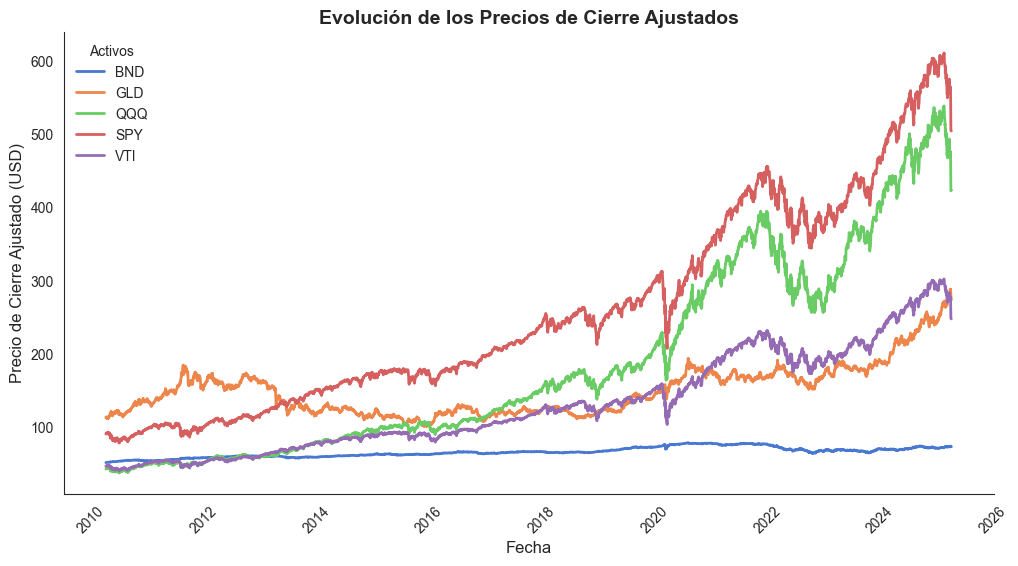

In [ ]:

# Graficar los precios de cierre
# Configurar estilo minimalista
sns.set_style("white")  # Fondo blanco sin líneas
plt.figure(figsize=(12, 6))

# Obtener colores suaves de Seaborn
colors = sns.color_palette("muted", n_colors=len(adj_close_df.columns))



# Graficar cada activo con colores suaves
for i, ticker in enumerate(adj_close_df.columns):
    plt.plot(adj_close_df.index, adj_close_df[ticker], label=ticker, linewidth=2, color=colors[i])

# Agregar títulos y etiquetas
plt.title("Evolución de los Precios de Cierre Ajustados", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio de Cierre Ajustado (USD)", fontsize=12)

# Eliminar bordes superiores y derechos para un look más limpio
sns.despine(top=True, right=True, left=False, bottom=False)

# Rotar fechas para mejor visibilidad
plt.xticks(rotation=45)

# Agregar leyenda con un diseño discreto
plt.legend(title="Activos", fontsize=10, loc="upper left", frameon=False)

# Mostrar la gráfica
plt.show()

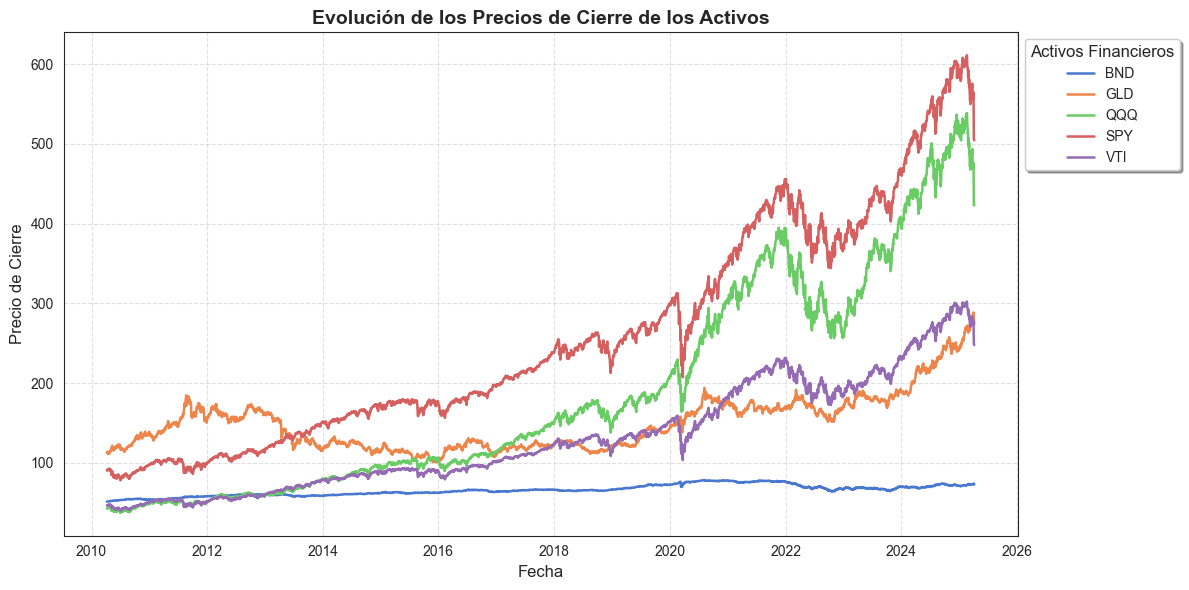

In [ ]:
plt.figure(figsize=(12, 6))

# Graficar cada activo con diferentes colores
colors = sns.color_palette("muted", n_colors=len(adj_close_df.columns))
for ticker, color in zip(adj_close_df.columns, colors):
    plt.plot(adj_close_df.index, adj_close_df[ticker], label=ticker, color=color, linewidth=1.8)

# Mejoras en la leyenda
plt.legend(
    title="Activos Financieros",  # Título de la leyenda
    title_fontsize=12,  # Tamaño del título
    fontsize=10,  # Tamaño de las etiquetas
    loc='upper left',  # Ubicación
    bbox_to_anchor=(1, 1),  # Mueve la leyenda fuera del gráfico
    frameon=True,  # Agrega un borde sutil
    fancybox=True,  # Borde redondeado
    shadow=True  # Sombra ligera
)

# Mejoras en los ejes y título
plt.title("Evolución de los Precios de Cierre de los Activos", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio de Cierre", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)  # Líneas de fondo más sutiles
plt.tight_layout()  # Ajustar el diseño

# Mostrar el gráfico
plt.show()

## 📌 Paso 2: Calcular los rendimientos logarítmicos  

Una vez que tenemos los datos históricos de los activos financieros, el siguiente paso es calcular los **rendimientos logarítmicos**.  

Los rendimientos logarítmicos se calculan con la siguiente fórmula:  

$$
\begin{aligned}
r_t &= \ln\left(\frac{P_t}{P_{t-1}}\right) \\
\text{donde:} \\
r_t &= \text{rendimiento logarítmico en el período } t, \\
P_t &= \text{precio del activo en el período actual}, \\
P_{t-1} &= \text{precio del activo en el período anterior}.
\end{aligned}
$$

🔍 **Objetivo**: Obtener una serie de rendimientos que nos permitan analizar la distribución del riesgo en el portafolio.

In [ ]:
# Calcular los rendimientos logarítmicos
log_returns = np.log(adj_close_df.div(adj_close_df.shift(1)))

# Eliminar filas con valores NaN generados por el shift
log_returns.dropna(inplace=True)

# Imprimir los primeros registros para verificar
print(log_returns.head())

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2010-04-09  0.001901  0.008750  0.005932  0.006546  0.006744
2010-04-12  0.001013 -0.005559  0.000815  0.001588  0.002292
2010-04-13  0.002023 -0.002836  0.005082  0.000751  0.000981
2010-04-14 -0.000758  0.003013  0.011892  0.011286  0.012181
2010-04-15  0.001516  0.005470  0.004398  0.000824  0.001290


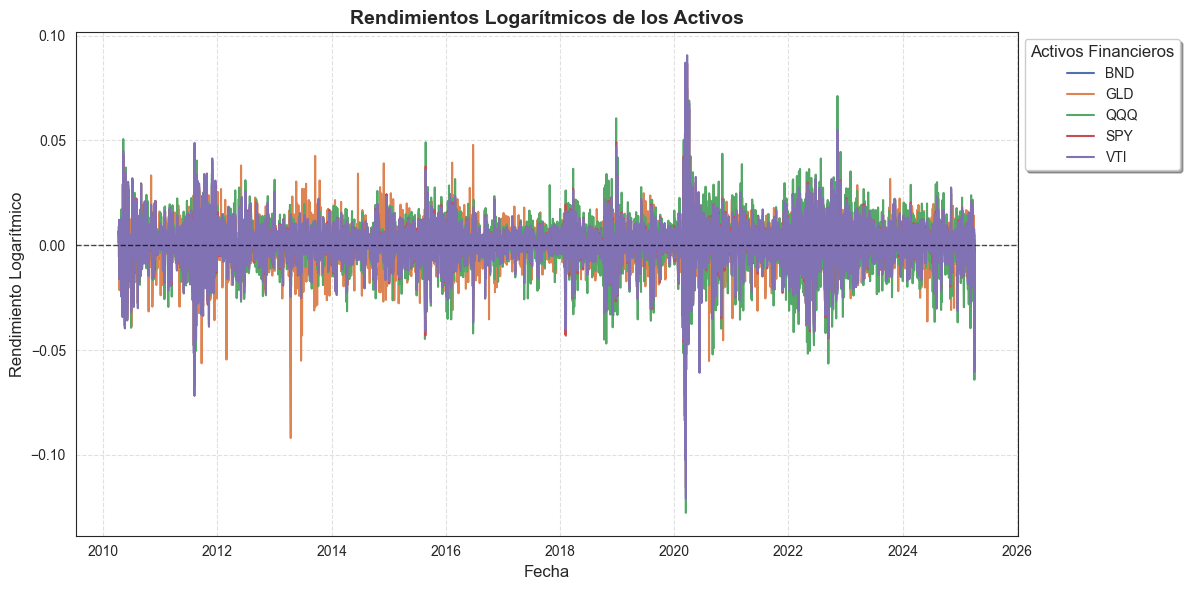

In [ ]:

#
# Crear la figura
plt.figure(figsize=(12, 6))

# Obtener colores de Seaborn
colors = sns.color_palette("deep", n_colors=len(log_returns.columns))

# Graficar cada activo
for ticker, color in zip(log_returns.columns, colors):
    plt.plot(log_returns.index, log_returns[ticker], label=ticker, color=color, linewidth=1.5)

# Mejorar la leyenda
plt.legend(
    title="Activos Financieros", title_fontsize=12, fontsize=10,
    loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fancybox=True, shadow=True
)

# Mejorar etiquetas y título
plt.title("Rendimientos Logarítmicos de los Activos", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle="--", alpha=0.7)  # Línea base en 0
plt.grid(True, linestyle="--", alpha=0.6)  # Líneas de fondo más sutiles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 📌 Paso 3: Asignación de Pesos a los Activos  

Una vez calculados los **rendimientos logarítmicos**, el siguiente paso es asignar los pesos a cada activo dentro del portafolio. Estos pesos representan la proporción del capital invertido en cada activo y juegan un papel clave en la determinación del **riesgo total**.  

### 🎯 Métodos para asignar los pesos  
Existen diferentes estrategias para asignar los pesos en un portafolio:  

- **Pesos iguales** 📊: Se asigna el mismo porcentaje a cada activo.  
- **Proporcional al valor de mercado** 💰: Se basa en la capitalización de mercado de cada activo.  
- **Optimización de riesgo-retorno** 📈: Se ajustan los pesos para minimizar la volatilidad o maximizar el rendimiento esperado.  


In [ ]:

# Definir el valor total del portafolio
portfolio_value = 1_000_000  # 1 millón de dólares

# Asignar pesos a los activos (deben sumar 1 y coincidir con los tickers)
weights = np.array([0.2, 0.3, 0.2, 0.2, 0.1])

# Validaciones: Asegurar que los pesos coincidan con el número de activos y sumen 1
if len(weights) != len(tickers):
    raise ValueError(f"Error: Hay {len(tickers)} activos, pero {len(weights)} pesos asignados.")

if not np.isclose(np.sum(weights), 1):
    raise ValueError("Error: La suma de los pesos debe ser exactamente 1.")

# Mostrar los pesos asignados
print("✅ Pesos asignados correctamente:", weights)


✅ Pesos asignados correctamente: [0.2 0.3 0.2 0.2 0.1]


In [ ]:
# Calcular los rendimientos históricos del portafolio
# Multiplicamos los rendimientos logarítmicos de cada activo por su peso en el portafolio
historical_returns = (log_returns * weights).sum(axis=1)

# Imprimir los rendimientos históricos del portafolio
print(historical_returns)


Date
2010-04-09    0.006175
2010-04-12   -0.000755
2010-04-13    0.000819
2010-04-14    0.006606
2010-04-15    0.003118
                ...   
2025-04-01    0.002541
2025-04-02    0.003955
2025-04-03   -0.027060
2025-04-04   -0.037876
2025-04-07   -0.009143
Length: 3773, dtype: float64


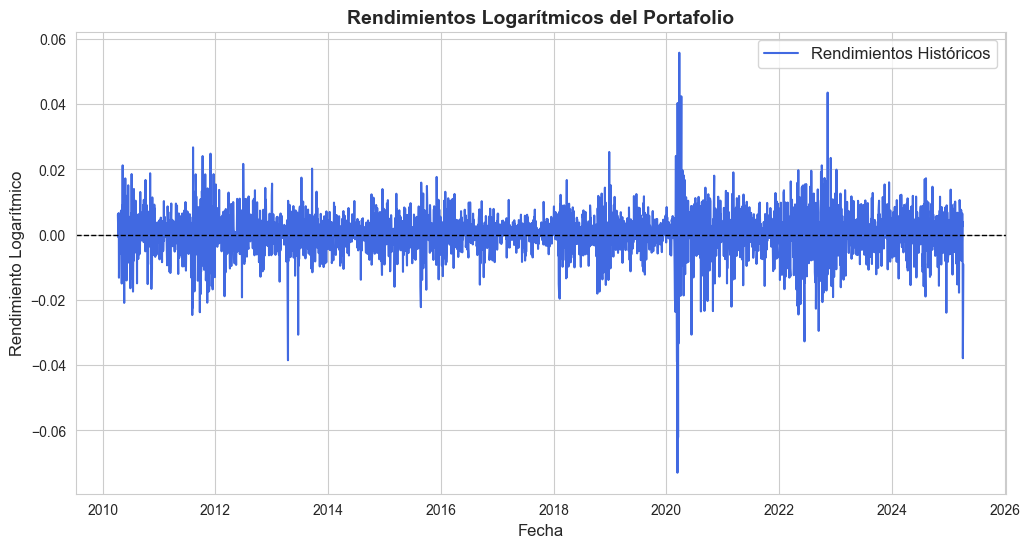

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo limpio

# Graficar los rendimientos históricos del portafolio
plt.plot(historical_returns, color="royalblue", linewidth=1.5, label="Rendimientos Históricos")

# Títulos y etiquetas
plt.title("Rendimientos Logarítmicos del Portafolio", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)

# Agregar línea base en y=0
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Leyenda mejorada
plt.legend(frameon=True, fontsize=12, loc="upper right")

# Mostrar gráfico
plt.show()


In [ ]:
# Permitir que el usuario defina la ventana de días
days = int(input("Ingrese la cantidad de días para la ventana móvil: "))

# Validar que el valor ingresado sea positivo y razonable
if days <= 0 or days > len(historical_returns):
    raise ValueError("El número de días debe estar entre 1 y el total de registros disponibles.")


ValueError: invalid literal for int() with base 10: ''

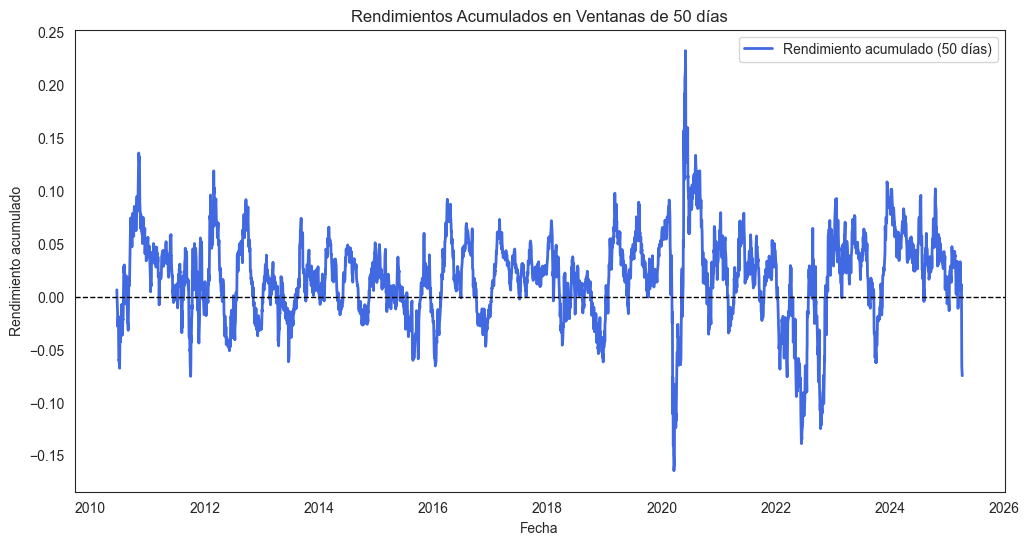

In [ ]:
# Rendimientos acumulados en ventanas móviles
range_returns = historical_returns.rolling(window=days).apply(lambda x: (x + 1).prod() - 1)

# Graficar los rendimientos acumulados
plt.figure(figsize=(12, 6))
plt.plot(range_returns, color="royalblue", linewidth=2, label=f'Rendimiento acumulado ({days} días)')
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)  # Línea en 0 para referencia
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.title(f"Rendimientos Acumulados en Ventanas de {days} días")
plt.legend()
plt.show()

## 📌 Paso 3: Asignación de Pesos a los Activos  

Una vez calculados los **rendimientos logarítmicos**, el siguiente paso es asignar los pesos a cada activo dentro del portafolio. Estos pesos representan la proporción del capital invertido en cada activo y juegan un papel clave en la determinación del **riesgo total**.  

### 🎯 Métodos para asignar los pesos  
Existen diferentes estrategias para asignar los pesos en un portafolio:  

- **Pesos iguales** 📊: Se asigna el mismo porcentaje a cada activo.  
- **Proporcional al valor de mercado** 💰: Se basa en la capitalización de mercado de cada activo.  
- **Optimización de riesgo-retorno** 📈: Se ajustan los pesos para minimizar la volatilidad o maximizar el rendimiento esperado.  


In [ ]:

# Definir el valor total del portafolio
portfolio_value = 1_000_000  # 1 millón de dólares

# Asignar pesos a los activos (deben sumar 1 y coincidir con los tickers)
weights = np.array([0.2, 0.3, 0.2, 0.2, 0.1])

# Validaciones: Asegurar que los pesos coincidan con el número de activos y sumen 1
if len(weights) != len(tickers):
    raise ValueError(f"Error: Hay {len(tickers)} activos, pero {len(weights)} pesos asignados.")

if not np.isclose(np.sum(weights), 1):
    raise ValueError("Error: La suma de los pesos debe ser exactamente 1.")

# Mostrar los pesos asignados
print("✅ Pesos asignados correctamente:", weights)


✅ Pesos asignados correctamente: [0.2 0.3 0.2 0.2 0.1]


In [ ]:
# Calcular los rendimientos históricos del portafolio
# Multiplicamos los rendimientos logarítmicos de cada activo por su peso en el portafolio
historical_returns = (log_returns * weights).sum(axis=1)

# Imprimir los rendimientos históricos del portafolio
print(historical_returns)


Date
2010-04-09    0.006175
2010-04-12   -0.000755
2010-04-13    0.000818
2010-04-14    0.006606
2010-04-15    0.003118
                ...   
2025-04-01    0.002541
2025-04-02    0.003955
2025-04-03   -0.027060
2025-04-04   -0.037876
2025-04-07   -0.009143
Length: 3773, dtype: float64


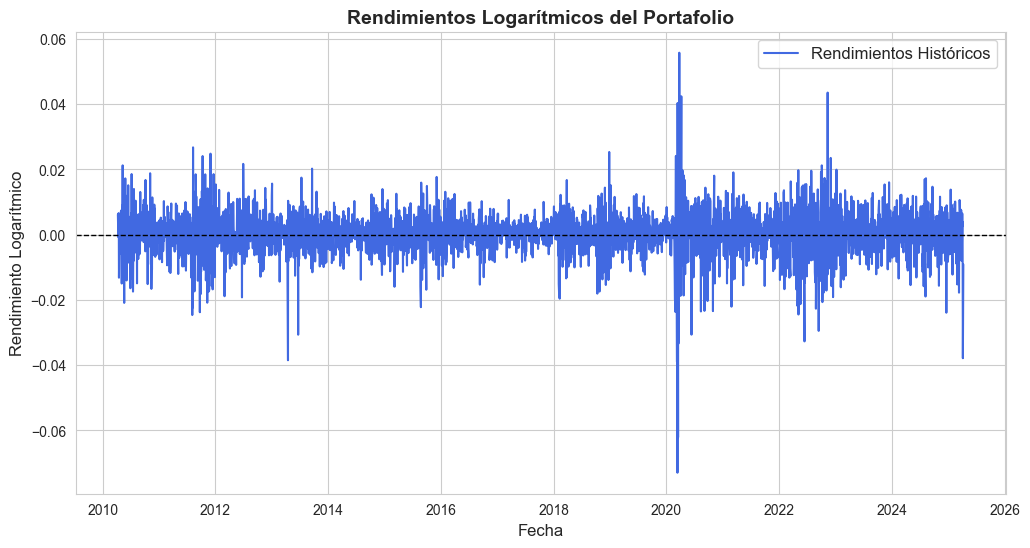

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo limpio

# Graficar los rendimientos históricos del portafolio
plt.plot(historical_returns, color="royalblue", linewidth=1.5, label="Rendimientos Históricos")

# Títulos y etiquetas
plt.title("Rendimientos Logarítmicos del Portafolio", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)

# Agregar línea base en y=0
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Leyenda mejorada
plt.legend(frameon=True, fontsize=12, loc="upper right")

# Mostrar gráfico
plt.show()


In [ ]:
# Permitir que el usuario defina la ventana de días
days = int(input("Ingrese la cantidad de días para la ventana móvil: "))

# Validar que el valor ingresado sea positivo y razonable
if days <= 0 or days > len(historical_returns):
    raise ValueError("El número de días debe estar entre 1 y el total de registros disponibles.")


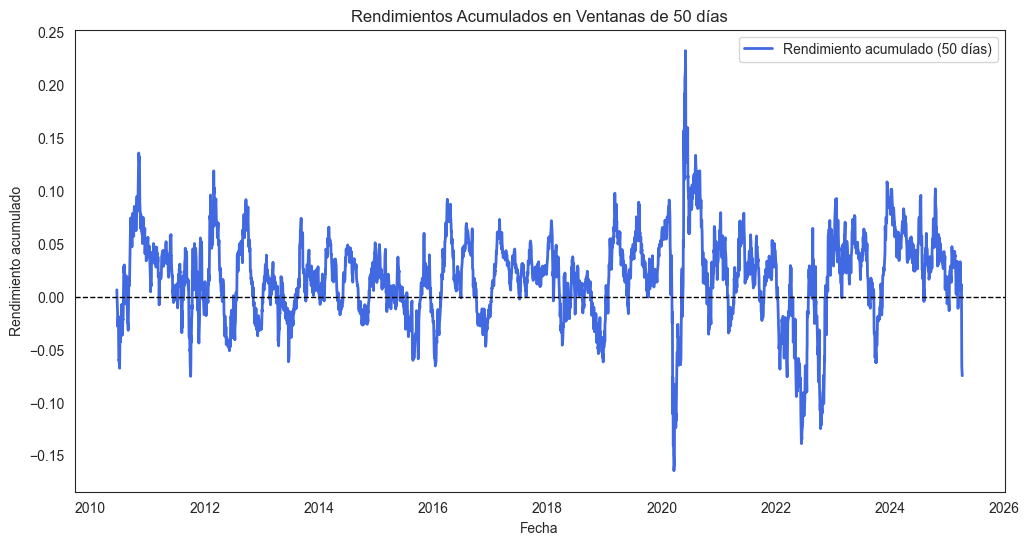

In [ ]:
# Rendimientos acumulados en ventanas móviles
range_returns = historical_returns.rolling(window=days).apply(lambda x: (x + 1).prod() - 1)

# Graficar los rendimientos acumulados
plt.figure(figsize=(12, 6))
plt.plot(range_returns, color="royalblue", linewidth=2, label=f'Rendimiento acumulado ({days} días)')
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)  # Línea en 0 para referencia
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.title(f"Rendimientos Acumulados en Ventanas de {days} días")
plt.legend()
plt.show()

## 📌 Paso 4: Implementación de los Métodos de Cálculo del VaR
Una vez definidos los pesos del portafolio, el siguiente paso consiste en implementar los diferentes métodos de cálculo del Valor en Riesgo (VaR). Este valor representa la pérdida máxima esperada en un horizonte temporal determinado y con un cierto nivel de confianza.

In [ ]:
confidence_interval = 0.99  # Nivel de confianza del 99%

# Calcular el VaR utilizando percentiles
VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value

# Imprimir el resultado de forma clara
print(f"Valor en Riesgo (VaR) al {confidence_interval*100:.0f}% de confianza: ${VaR:,.2f}")


Valor en Riesgo (VaR) al 99% de confianza: $103,878.31


## 📌 Paso 5: Visualización de los Resultados mediante Gráficos
Una vez calculado el VaR utilizando los distintos métodos, es fundamental visualizar los resultados para interpretar de forma clara y rápida el riesgo del portafolio.

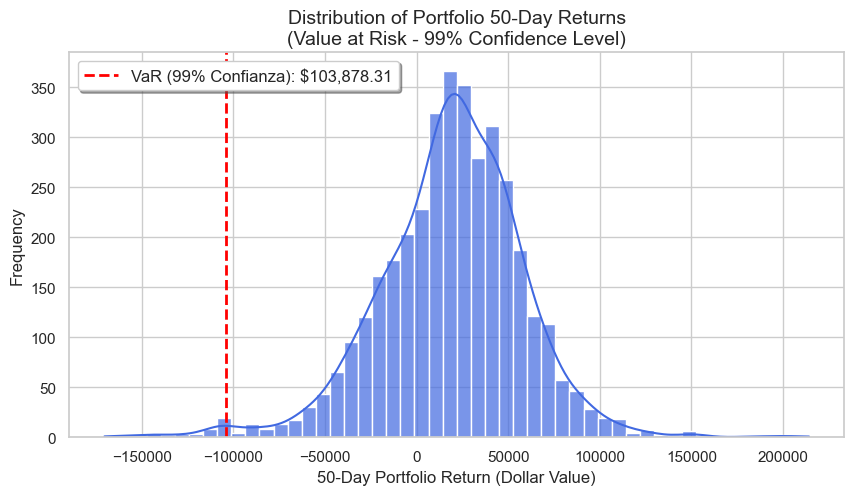

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum().dropna()
range_returns_dollar = range_returns * portfolio_value

# Configurar el estilo de la gráfica
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Histogram + KDE
sns.histplot(range_returns_dollar, bins=50, kde=True, color="royalblue", alpha=0.7)

# Línea de VaR
plt.axvline(-VaR, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_interval:.0%} Confianza): ${VaR:,.2f}')

# Etiquetas y título
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Portfolio {return_window}-Day Returns\n(Value at Risk - {confidence_interval:.0%} Confidence Level)', fontsize=14)

# Leyenda mejorada
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True)
plt.show()

# **Método Paramétrico** 📊

El **método paramétrico**, también conocido como **varianza-covarianza**, es una de las formas más comunes para calcular el **Valor en Riesgo (VaR)**. Se basa en la suposición de que los rendimientos de los activos siguen una **distribución normal** y utiliza sus estadísticas clave, como la **media** y la **desviación estándar**, para estimar posibles pérdidas.  

Nuestro objetivo es calcular el VaR de un portafolio de inversión utilizando el enfoque paramétrico (Var-Cov). Para ello, seguiremos los siguientes pasos:

1. Obtener datos históricos de activos financieros.
2. Calcular los rendimientos logarítmicos.
3. Asignar pesos a cada activo en la cartera.
4. Calcular el VaR utilizando la fórmula basada en la media, la desviación estándar y el nivel de confianza.
5. Visualizar los resultados con gráficos.

📌 Este análisis permite estimar el riesgo bajo supuestos estadísticos que simplifican el proceso, siendo útil para decisiones rápidas y escenarios normales de mercado.

¡Vamos allá! 📊

[Fuente del código](https://ryanoconnellfinance.com/estimating-value-at-risk-with-python/)

## 📌 Paso 1: Obtener datos históricos de activos financieros  

El primer paso en nuestro cálculo del **VaR** es recopilar datos históricos de los activos que conforman el portafolio. Estos datos suelen incluir los precios de cierre ajustados de cada activo en un período determinado.  

Para ello, podemos utilizar fuentes como:  
- **Yahoo Finance** 📈  
- **Google Finance** 📊  
- **APIs de datos financieros** 🔗  

Disponer de una serie de precios históricos nos permitirá calcular los rendimientos y analizar la volatilidad del portafolio.  

🔍 **Objetivo**: Obtener un dataset confiable con el historial de precios necesario para el análisis de riesgo.

In [ ]:
# 🔹 Permitir que el usuario ingrese la fecha final manualmente (opcional)
fecha_final_input = input("Ingrese la fecha final (YYYY-MM-DD) o presione Enter para usar la actual: ")

if fecha_final_input:
    try:
        endDate = dt.datetime.strptime(fecha_final_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    endDate = dt.datetime.now()

# 🔹 Permitir que el usuario ingrese la fecha de inicio o el número de años
fecha_inicio_input = input("Ingrese la fecha de inicio (YYYY-MM-DD) o presione Enter para calcular desde años atrás: ")

if fecha_inicio_input:
    try:
        startDate = dt.datetime.strptime(fecha_inicio_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    # Si el usuario no proporciona una fecha de inicio, restamos "years"
    years = int(input("Ingrese el número de años de datos históricos: ") or 15)
    if years <= 0:
        raise ValueError("El número de años debe ser mayor que 0.")
    startDate = endDate - relativedelta(years=years)

# 🔹 Lista de tickers a analizar (se puede modificar)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# 🔹 Mostrar información
print(f"\n🔹 Obteniendo datos desde {startDate.date()} hasta {endDate.date()}.")
print(f"🔹 Tickers seleccionados: {', '.join(tickers)}")


🔹 Obteniendo datos desde 2010-04-07 hasta 2025-04-07.
🔹 Tickers seleccionados: SPY, BND, GLD, QQQ, VTI


In [ ]:
# Descargar datos de los tickers seleccionados
data = yf.download(tickers, start=startDate, end=endDate)

# 🔍 Imprimir las columnas disponibles
#print("Columnas disponibles:", data.columns)

# Extraer los datos de cierre correctamente desde MultiIndex
adj_close_df = data.xs('Close', level=0, axis=1)  # Obtiene solo los valores de 'Close'

# Manejo de valores faltantes (sin warning)
adj_close_df = adj_close_df.ffill().dropna()

# Mostrar resultado
#print(adj_close_df.head())

# Imprimir los primeros 10 registros en formato tabular
print(tabulate(adj_close_df.head(10), headers="keys", tablefmt="fancy_grid"))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed

╒═════════════════════╤═════════╤════════╤═════════╤═════════╤═════════╕
│ Date                │     BND │    GLD │     QQQ │     SPY │     VTI │
╞═════════════════════╪═════════╪════════╪═════════╪═════════╪═════════╡
│ 2010-04-08 00:00:00 │ 51.301  │ 112.65 │ 42.5546 │ 90.2556 │ 46.2722 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-09 00:00:00 │ 51.3987 │ 113.64 │ 42.8078 │ 90.8484 │ 46.5853 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-12 00:00:00 │ 51.4508 │ 113.01 │ 42.8427 │ 90.9927 │ 46.6922 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-13 00:00:00 │ 51.555  │ 112.69 │ 43.061  │ 91.0611 │ 46.738  │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-14 00:00:00 │ 51.5159 │ 113.03 │ 43.5761 │ 92.0946 │ 47.3108 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-15 00:00:00 │ 51.5941 │ 113.65 │ 43.7682 

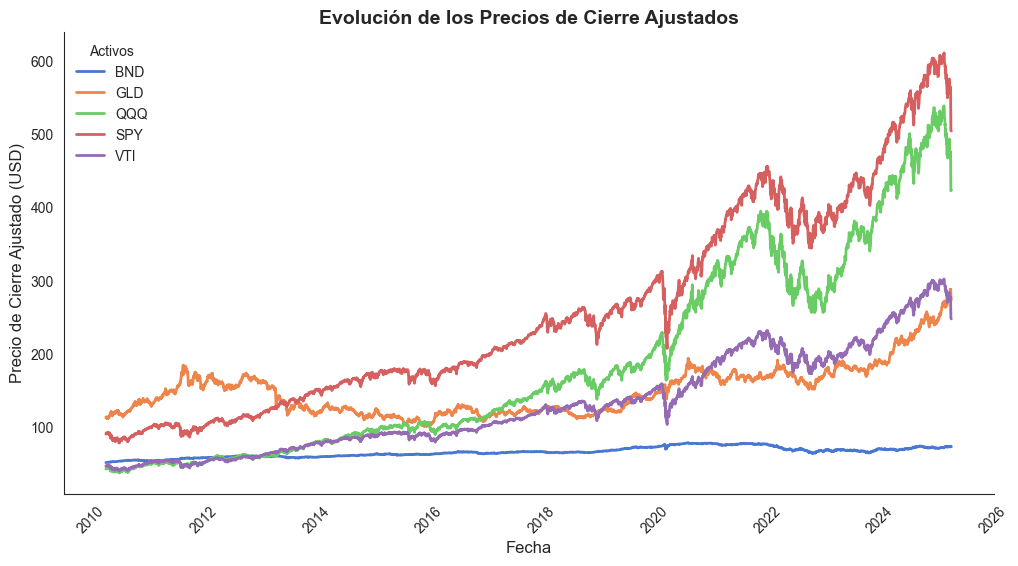

In [ ]:

# Graficar los precios de cierre
# Configurar estilo minimalista
sns.set_style("white")  # Fondo blanco sin líneas
plt.figure(figsize=(12, 6))

# Obtener colores suaves de Seaborn
colors = sns.color_palette("muted", n_colors=len(adj_close_df.columns))

# Graficar cada activo con colores suaves
for i, ticker in enumerate(adj_close_df.columns):
    plt.plot(adj_close_df.index, adj_close_df[ticker], label=ticker, linewidth=2, color=colors[i])

# Agregar títulos y etiquetas
plt.title("Evolución de los Precios de Cierre Ajustados", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio de Cierre Ajustado (USD)", fontsize=12)

# Eliminar bordes superiores y derechos para un look más limpio
sns.despine(top=True, right=True, left=False, bottom=False)

# Rotar fechas para mejor visibilidad
plt.xticks(rotation=45)

# Agregar leyenda con un diseño discreto
plt.legend(title="Activos", fontsize=10, loc="upper left", frameon=False)

# Mostrar la gráfica
plt.show()

## 📌 Paso 2: Calcular los rendimientos logarítmicos  

Una vez que tenemos los datos históricos de los activos financieros, el siguiente paso es calcular los **rendimientos logarítmicos**.  

Los rendimientos logarítmicos se calculan con la siguiente fórmula:  

$$
\begin{aligned}
r_t &= \ln\left(\frac{P_t}{P_{t-1}}\right) \\
\text{donde:} \\
r_t &= \text{rendimiento logarítmico en el período } t, \\
P_t &= \text{precio del activo en el período actual}, \\
P_{t-1} &= \text{precio del activo en el período anterior}.
\end{aligned}
$$

🔍 **Objetivo**: Obtener una serie de rendimientos que nos permitan analizar la distribución del riesgo en el portafolio.

In [ ]:
# Solicitar al usuario el número de días para la ventana móvil
days = int(input("Ingrese el número de días para calcular los rendimientos acumulados: "))

# Calcular los rendimientos acumulados en la ventana de 'days' días
historical_x_day_returns = historical_returns.rolling(window=days).sum()

# Eliminar valores NaN generados por la ventana móvil
historical_x_day_returns.dropna(inplace=True)

# Mostrar los primeros valores calculados
print(historical_x_day_returns.head())


Date
2010-04-15    0.015962
2010-04-16   -0.003407
2010-04-19   -0.002254
2010-04-20    0.001694
2010-04-21   -0.001804
dtype: float64


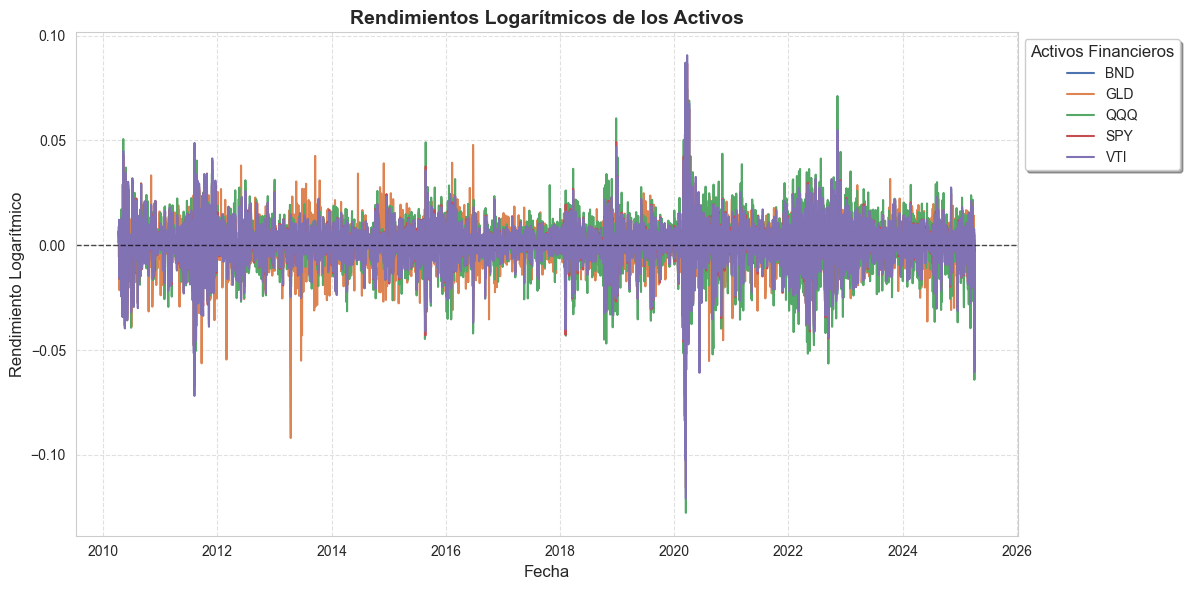

In [ ]:

#
# Crear la figura
plt.figure(figsize=(12, 6))

# Obtener colores de Seaborn
colors = sns.color_palette("deep", n_colors=len(log_returns.columns))

# Graficar cada activo
for ticker, color in zip(log_returns.columns, colors):
    plt.plot(log_returns.index, log_returns[ticker], label=ticker, color=color, linewidth=1.5)

# Mejorar la leyenda
plt.legend(
    title="Activos Financieros", title_fontsize=12, fontsize=10,
    loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fancybox=True, shadow=True
)

# Mejorar etiquetas y título
plt.title("Rendimientos Logarítmicos de los Activos", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle="--", alpha=0.7)  # Línea base en 0
plt.grid(True, linestyle="--", alpha=0.6)  # Líneas de fondo más sutiles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 📌 Paso 3: Asignación de Pesos a los Activos  

Una vez calculados los **rendimientos logarítmicos**, el siguiente paso es asignar los pesos a cada activo dentro del portafolio. Estos pesos representan la proporción del capital invertido en cada activo y juegan un papel clave en la determinación del **riesgo total**.  

### 🎯 Métodos para asignar los pesos  
Existen diferentes estrategias para asignar los pesos en un portafolio:  

- **Pesos iguales** 📊: Se asigna el mismo porcentaje a cada activo.  
- **Proporcional al valor de mercado** 💰: Se basa en la capitalización de mercado de cada activo.  
- **Optimización de riesgo-retorno** 📈: Se ajustan los pesos para minimizar la volatilidad o maximizar el rendimiento esperado.  


In [ ]:

# Definir el valor total del portafolio
portfolio_value = 1_000_000  # 1 millón de dólares

# Asignar pesos a los activos (deben sumar 1 y coincidir con los tickers)
weights = np.array([0.2, 0.3, 0.2, 0.2, 0.1])

# Validaciones: Asegurar que los pesos coincidan con el número de activos y sumen 1
if len(weights) != len(tickers):
    raise ValueError(f"Error: Hay {len(tickers)} activos, pero {len(weights)} pesos asignados.")

if not np.isclose(np.sum(weights), 1):
    raise ValueError("Error: La suma de los pesos debe ser exactamente 1.")

# Mostrar los pesos asignados
print("✅ Pesos asignados correctamente:", weights)


✅ Pesos asignados correctamente: [0.2 0.3 0.2 0.2 0.1]


In [ ]:
# Calcular los rendimientos históricos del portafolio
# Multiplicamos los rendimientos logarítmicos de cada activo por su peso en el portafolio
historical_returns = (log_returns * weights).sum(axis=1)

# Imprimir los rendimientos históricos del portafolio
print(historical_returns)


Date
2010-04-09    0.006175
2010-04-12   -0.000755
2010-04-13    0.000818
2010-04-14    0.006606
2010-04-15    0.003118
                ...   
2025-04-01    0.002541
2025-04-02    0.003955
2025-04-03   -0.027060
2025-04-04   -0.037876
2025-04-07   -0.009143
Length: 3773, dtype: float64


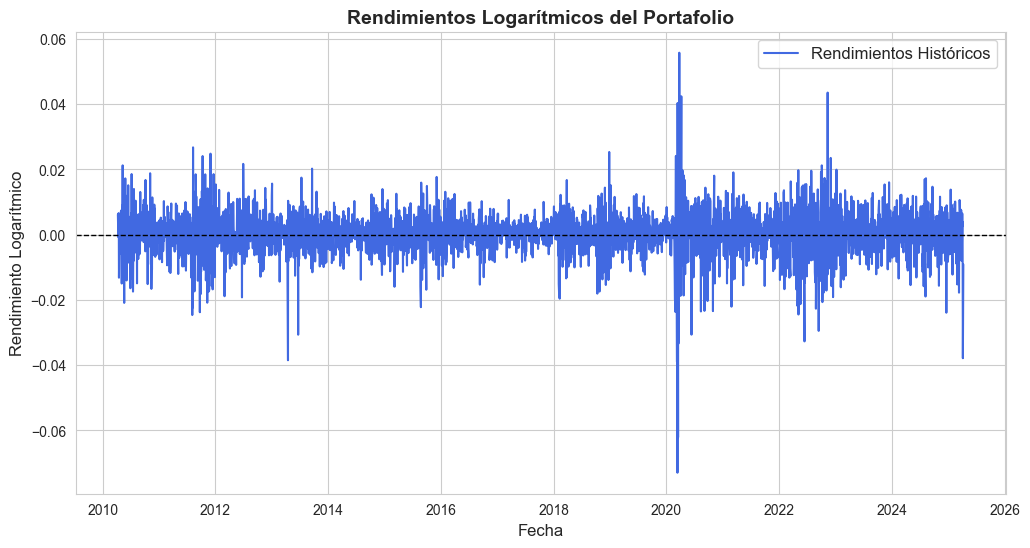

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo limpio

# Graficar los rendimientos históricos del portafolio
plt.plot(historical_returns, color="royalblue", linewidth=1.5, label="Rendimientos Históricos")

# Títulos y etiquetas
plt.title("Rendimientos Logarítmicos del Portafolio", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)

# Agregar línea base en y=0
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Leyenda mejorada
plt.legend(frameon=True, fontsize=12, loc="upper right")

# Mostrar gráfico
plt.show()


In [ ]:
# Permitir que el usuario defina la ventana de días
days = int(input("Ingrese la cantidad de días para la ventana móvil: "))

# Validar que el valor ingresado sea positivo y razonable
if days <= 0 or days > len(historical_returns):
    raise ValueError("El número de días debe estar entre 1 y el total de registros disponibles.")


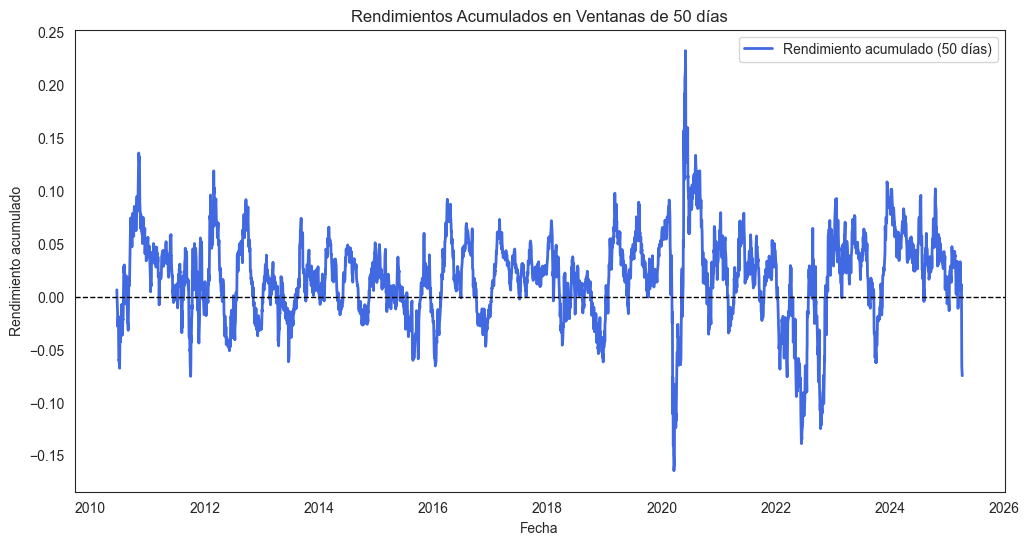

In [ ]:
# Rendimientos acumulados en ventanas móviles
range_returns = historical_returns.rolling(window=days).apply(lambda x: (x + 1).prod() - 1)

# Graficar los rendimientos acumulados
plt.figure(figsize=(12, 6))
plt.plot(range_returns, color="royalblue", linewidth=2, label=f'Rendimiento acumulado ({days} días)')
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)  # Línea en 0 para referencia
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.title(f"Rendimientos Acumulados en Ventanas de {days} días")
plt.legend()
plt.show()

## 📌 Paso 4: Implementación de los Métodos de Cálculo del VaR
Una vez definidos los pesos del portafolio, el siguiente paso consiste en implementar los diferentes métodos de cálculo del Valor en Riesgo (VaR). Este valor representa la pérdida máxima esperada en un horizonte temporal determinado y con un cierto nivel de confianza.

In [ ]:
# Calcular la matriz de covarianza anualizada (suponiendo 252 días de mercado al año)
cov_matrix = log_returns.cov() * 252

# Calcular la desviación estándar del portafolio (volatilidad)
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

# Imprimir el resultado
print(f"Desviación estándar del portafolio (Volatilidad Anualizada): {portfolio_std_dev:.6f}")


Desviación estándar del portafolio (Volatilidad Anualizada): 0.106980


In [ ]:

# Definir los niveles de confianza para el cálculo del VaR
confidence_levels = [0.90, 0.95, 0.99]

# Lista para almacenar los valores de VaR correspondientes a cada nivel de confianza
VaRs = []

# Calcular el VaR para cada nivel de confianza
for cl in confidence_levels:
    # Cálculo del VaR usando el método paramétrico basado en la distribución normal
    VaR = portfolio_value * (
        norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252) - historical_returns.mean() * days
    )

    # Almacenar el resultado
    VaRs.append(VaR)

# Imprimir los resultados
for cl, var in zip(confidence_levels, VaRs):
    print(f"VaR al {cl:.0%} de confianza: ${var:,.2f}")


VaR al 90% de confianza: $-21,045.50
VaR al 95% de confianza: $-26,520.14
VaR al 99% de confianza: $-36,789.65


In [ ]:
# Imprimir encabezado con formato alineado
print(f'{"Confidence Level":<20} {"Value at Risk (VaR)":>20}')
print('-' * 45)

# Imprimir los valores de VaR para cada nivel de confianza
for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}% {"":<8} ${VaR:>15,.2f}')


Confidence Level      Value at Risk (VaR)
---------------------------------------------
    90%          $     -21,045.50
    95%          $     -26,520.14
    99%          $     -36,789.65


## 📌 Paso 5: Visualización de los Resultados mediante Gráficos
Una vez calculado el VaR utilizando los distintos métodos, es fundamental visualizar los resultados para interpretar de forma clara y rápida el riesgo del portafolio.

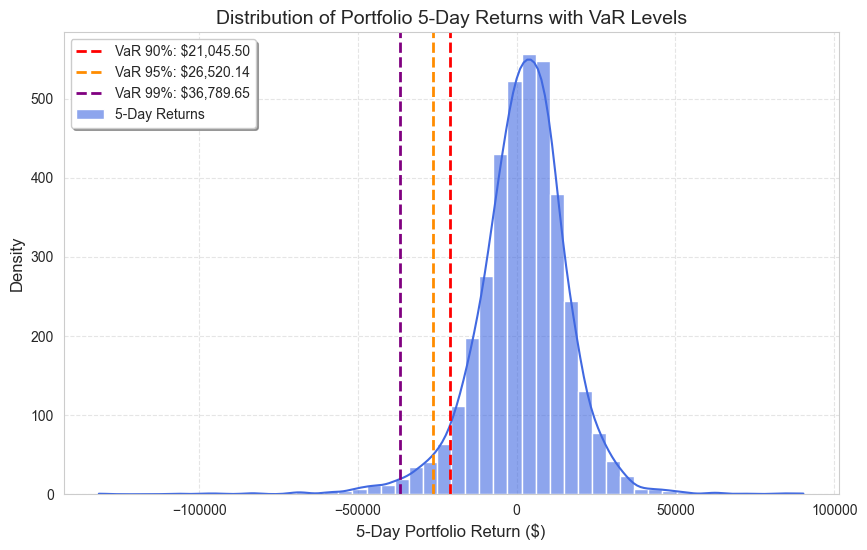

In [ ]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Crear figura y eje
plt.figure(figsize=(10, 6))

# Histograma de los rendimientos
sns.histplot(historical_x_day_returns_dollar, bins=50, kde=True, color='royalblue', alpha=0.6, label=f'{days}-Day Returns')

# Agregar líneas verticales para el VaR en cada nivel de confianza
colors = ['red', 'darkorange', 'purple']  # Colores diferenciados para cada VaR
for cl, VaR, color in zip(confidence_levels, VaRs, colors):
    plt.axvline(x=VaR, linestyle='--', color=color, linewidth=2, label=f'VaR {int(cl * 100)}%: ${-VaR:,.2f}')

# Etiquetas y título
plt.xlabel(f'{days}-Day Portfolio Return ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Distribution of Portfolio {days}-Day Returns with VaR Levels', fontsize=14)

# Cuadrícula sutil para mejor visualización
plt.grid(True, linestyle='--', alpha=0.5)

# Mejorar la leyenda con borde y ubicación óptima
plt.legend(frameon=True, shadow=True, loc='upper left', fontsize=10)

# Mostrar gráfico
plt.show()



# **Método Simulación Monte Carlo** 🎲

Nuestro objetivo es calcular el VaR de un portafolio de inversión mediante el método de simulación Monte Carlo. Para lograrlo, realizaremos los siguientes pasos:

1. Obtener datos históricos de activos financieros.
2. Calcular los rendimientos logarítmicos.
3. Asignar pesos a cada activo en la cartera.
4. Generar múltiples escenarios posibles de precios futuros utilizando simulaciones aleatorias.
5. Calcular los rendimientos simulados del portafolio.
6. Visualizar los resultados con gráficos.

📌 Este enfoque proporciona una visión más completa del riesgo, al considerar múltiples trayectorias posibles del mercado y no depender de una distribución específica.

¡Simulemos el futuro! 🧪📉

[Fuente del código](https://ryanoconnellfinance.com/how-to-calculate-value-at-risk/)

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

## 📌 Paso 1: Obtener datos históricos de activos financieros  

El primer paso en nuestro cálculo del **VaR** es recopilar datos históricos de los activos que conforman el portafolio. Estos datos suelen incluir los precios de cierre ajustados de cada activo en un período determinado.  

Para ello, podemos utilizar fuentes como:  
- **Yahoo Finance** 📈  
- **Google Finance** 📊  
- **APIs de datos financieros** 🔗  

Disponer de una serie de precios históricos nos permitirá calcular los rendimientos y analizar la volatilidad del portafolio.  

🔍 **Objetivo**: Obtener un dataset confiable con el historial de precios necesario para el análisis de riesgo.

In [ ]:
# 🔹 Permitir que el usuario ingrese la fecha final manualmente (opcional)
fecha_final_input = input("Ingrese la fecha final (YYYY-MM-DD) o presione Enter para usar la actual: ")

if fecha_final_input:
    try:
        endDate = dt.datetime.strptime(fecha_final_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    endDate = dt.datetime.now()

# 🔹 Permitir que el usuario ingrese la fecha de inicio o el número de años
fecha_inicio_input = input("Ingrese la fecha de inicio (YYYY-MM-DD) o presione Enter para calcular desde años atrás: ")

if fecha_inicio_input:
    try:
        startDate = dt.datetime.strptime(fecha_inicio_input, "%Y-%m-%d")
    except ValueError:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")
else:
    # Si el usuario no proporciona una fecha de inicio, restamos "years"
    years = int(input("Ingrese el número de años de datos históricos: ") or 15)
    if years <= 0:
        raise ValueError("El número de años debe ser mayor que 0.")
    startDate = endDate - relativedelta(years=years)

# 🔹 Lista de tickers a analizar (se puede modificar)
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# 🔹 Mostrar información
print(f"\n🔹 Obteniendo datos desde {startDate.date()} hasta {endDate.date()}.")
print(f"🔹 Tickers seleccionados: {', '.join(tickers)}")


🔹 Obteniendo datos desde 2010-04-07 hasta 2025-04-07.
🔹 Tickers seleccionados: SPY, BND, GLD, QQQ, VTI


In [ ]:
# Descargar datos de los tickers seleccionados
data = yf.download(tickers, start=startDate, end=endDate)

# 🔍 Imprimir las columnas disponibles
#print("Columnas disponibles:", data.columns)

# Extraer los datos de cierre correctamente desde MultiIndex
adj_close_df = data.xs('Close', level=0, axis=1)  # Obtiene solo los valores de 'Close'

# Manejo de valores faltantes (sin warning)
adj_close_df = adj_close_df.ffill().dropna()

# Mostrar resultado
#print(adj_close_df.head())

# Imprimir los primeros 10 registros en formato tabular
print(tabulate(adj_close_df.head(10), headers="keys", tablefmt="fancy_grid"))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed

╒═════════════════════╤═════════╤════════╤═════════╤═════════╤═════════╕
│ Date                │     BND │    GLD │     QQQ │     SPY │     VTI │
╞═════════════════════╪═════════╪════════╪═════════╪═════════╪═════════╡
│ 2010-04-08 00:00:00 │ 51.301  │ 112.65 │ 42.5546 │ 90.2556 │ 46.2722 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-09 00:00:00 │ 51.3987 │ 113.64 │ 42.8078 │ 90.8484 │ 46.5853 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-12 00:00:00 │ 51.4508 │ 113.01 │ 42.8427 │ 90.9927 │ 46.6922 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-13 00:00:00 │ 51.555  │ 112.69 │ 43.061  │ 91.0611 │ 46.738  │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-14 00:00:00 │ 51.5159 │ 113.03 │ 43.5761 │ 92.0946 │ 47.3108 │
├─────────────────────┼─────────┼────────┼─────────┼─────────┼─────────┤
│ 2010-04-15 00:00:00 │ 51.5941 │ 113.65 │ 43.7682 

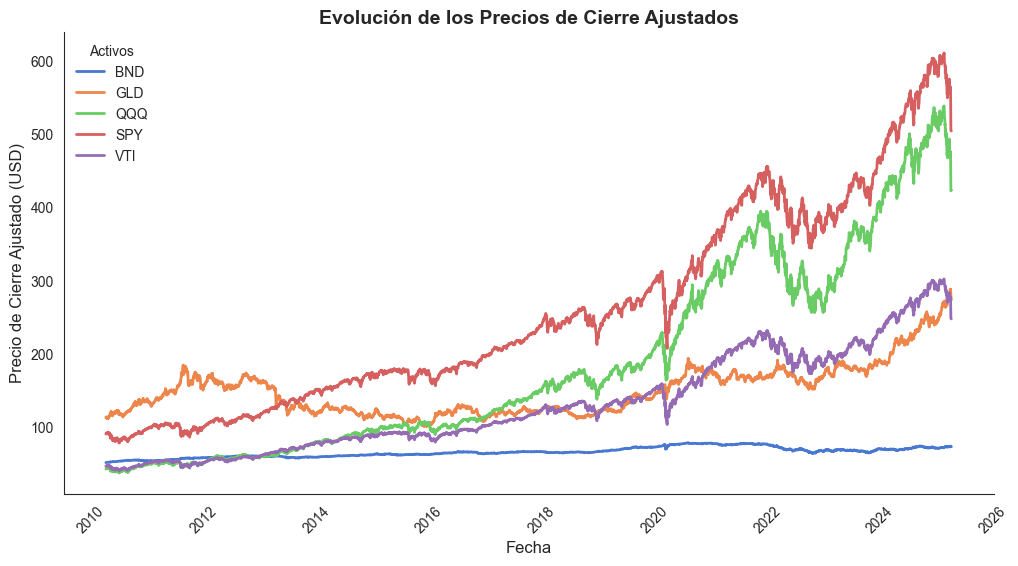

In [ ]:

# Graficar los precios de cierre
# Configurar estilo minimalista
sns.set_style("white")  # Fondo blanco sin líneas
plt.figure(figsize=(12, 6))

# Obtener colores suaves de Seaborn
colors = sns.color_palette("muted", n_colors=len(adj_close_df.columns))

# Graficar cada activo con colores suaves
for i, ticker in enumerate(adj_close_df.columns):
    plt.plot(adj_close_df.index, adj_close_df[ticker], label=ticker, linewidth=2, color=colors[i])

# Agregar títulos y etiquetas
plt.title("Evolución de los Precios de Cierre Ajustados", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio de Cierre Ajustado (USD)", fontsize=12)

# Eliminar bordes superiores y derechos para un look más limpio
sns.despine(top=True, right=True, left=False, bottom=False)

# Rotar fechas para mejor visibilidad
plt.xticks(rotation=45)

# Agregar leyenda con un diseño discreto
plt.legend(title="Activos", fontsize=10, loc="upper left", frameon=False)

# Mostrar la gráfica
plt.show()

## 📌 Paso 2: Calcular los rendimientos logarítmicos  

Una vez que tenemos los datos históricos de los activos financieros, el siguiente paso es calcular los **rendimientos logarítmicos**.  

Los rendimientos logarítmicos se calculan con la siguiente fórmula:  

$$
\begin{aligned}
r_t &= \ln\left(\frac{P_t}{P_{t-1}}\right) \\
\text{donde:} \\
r_t &= \text{rendimiento logarítmico en el período } t, \\
P_t &= \text{precio del activo en el período actual}, \\
P_{t-1} &= \text{precio del activo en el período anterior}.
\end{aligned}
$$

🔍 **Objetivo**: Obtener una serie de rendimientos que nos permitan analizar la distribución del riesgo en el portafolio.

In [ ]:
# Solicitar al usuario el número de días para la ventana móvil
days = int(input("Ingrese el número de días para calcular los rendimientos acumulados: "))

# Calcular los rendimientos acumulados en la ventana de 'days' días
historical_x_day_returns = historical_returns.rolling(window=days).sum()

# Eliminar valores NaN generados por la ventana móvil
historical_x_day_returns.dropna(inplace=True)

# Mostrar los primeros valores calculados
print(historical_x_day_returns.head())


Date
2010-04-15    0.015962
2010-04-16   -0.003407
2010-04-19   -0.002254
2010-04-20    0.001694
2010-04-21   -0.001804
dtype: float64


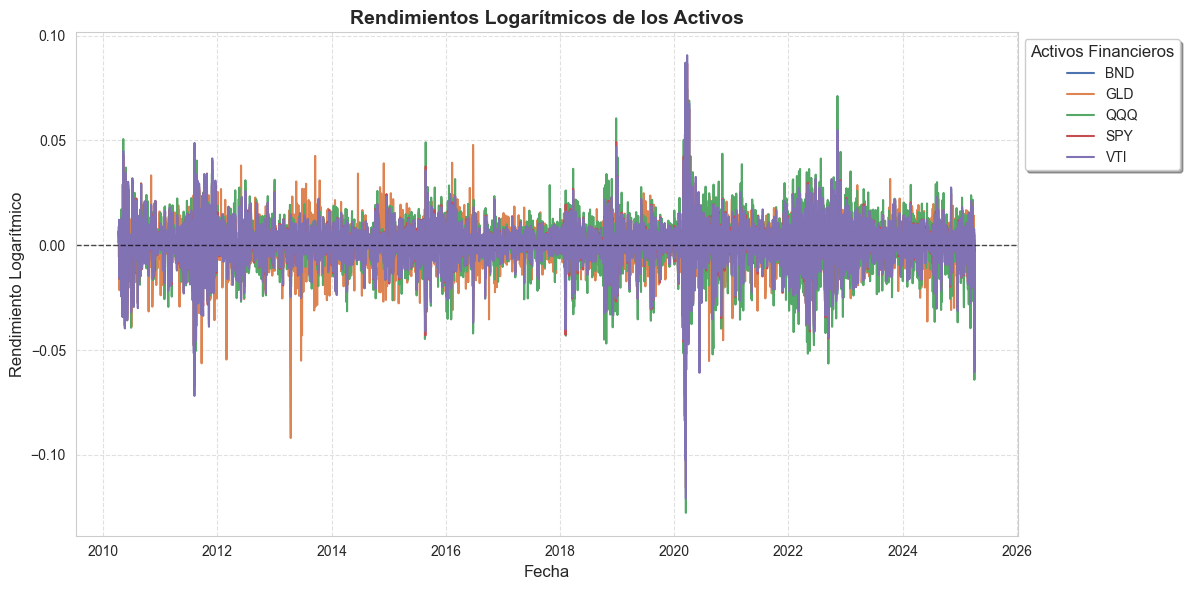

In [ ]:

# Crear la figura
plt.figure(figsize=(12, 6))

# Obtener colores de Seaborn
colors = sns.color_palette("deep", n_colors=len(log_returns.columns))

# Graficar cada activo
for ticker, color in zip(log_returns.columns, colors):
    plt.plot(log_returns.index, log_returns[ticker], label=ticker, color=color, linewidth=1.5)

# Mejorar la leyenda
plt.legend(
    title="Activos Financieros", title_fontsize=12, fontsize=10,
    loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fancybox=True, shadow=True
)

# Mejorar etiquetas y título
plt.title("Rendimientos Logarítmicos de los Activos", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle="--", alpha=0.7)  # Línea base en 0
plt.grid(True, linestyle="--", alpha=0.6)  # Líneas de fondo más sutiles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 📌 Paso 3: Asignación de Pesos a los Activos  

Una vez calculados los **rendimientos logarítmicos**, el siguiente paso es asignar los pesos a cada activo dentro del portafolio. Estos pesos representan la proporción del capital invertido en cada activo y juegan un papel clave en la determinación del **riesgo total**.  

### 🎯 Métodos para asignar los pesos  
Existen diferentes estrategias para asignar los pesos en un portafolio:  

- **Pesos iguales** 📊: Se asigna el mismo porcentaje a cada activo.  
- **Proporcional al valor de mercado** 💰: Se basa en la capitalización de mercado de cada activo.  
- **Optimización de riesgo-retorno** 📈: Se ajustan los pesos para minimizar la volatilidad o maximizar el rendimiento esperado.  


In [ ]:

# 📌 Definir el valor total del portafolio
portfolio_value = 1_000_000

# 📊 Asignar pesos a los activos (deben sumar 1 y coincidir con la cantidad de activos)
weights = np.array([0.2, 0.3, 0.2, 0.2, 0.1])

# ✅ Validación: Asegurar que los pesos coincidan con el número de activos
if len(weights) != len(tickers):
    raise ValueError(f"Error: Hay {len(tickers)} activos, pero {len(weights)} pesos asignados.")

# ✅ Validación: Asegurar que los pesos suman exactamente 1
if not np.isclose(np.sum(weights), 1):
    raise ValueError("Los pesos asignados deben sumar 1.")

# 📈 Calcular el rendimiento esperado del portafolio
portfolio_expected_return = expected_return(weights, log_returns)

# 📉 Calcular la desviación estándar del portafolio (volatilidad)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

# 📌 Mostrar resultados clave
print(f"Rendimiento Esperado del Portafolio: {portfolio_expected_return:.6f}")
print(f"Desviación Estándar del Portafolio: {portfolio_std_dev:.6f}")

Rendimiento Esperado del Portafolio: 0.000347
Desviación Estándar del Portafolio: 0.106980


In [ ]:
# Calcular los rendimientos históricos del portafolio
# Multiplicamos los rendimientos logarítmicos de cada activo por su peso en el portafolio
historical_returns = (log_returns * weights).sum(axis=1)

# Imprimir los rendimientos históricos del portafolio
print(historical_returns)


Date
2010-04-09    0.006175
2010-04-12   -0.000755
2010-04-13    0.000819
2010-04-14    0.006606
2010-04-15    0.003118
                ...   
2025-04-01    0.002541
2025-04-02    0.003955
2025-04-03   -0.027060
2025-04-04   -0.037876
2025-04-07   -0.009143
Length: 3773, dtype: float64


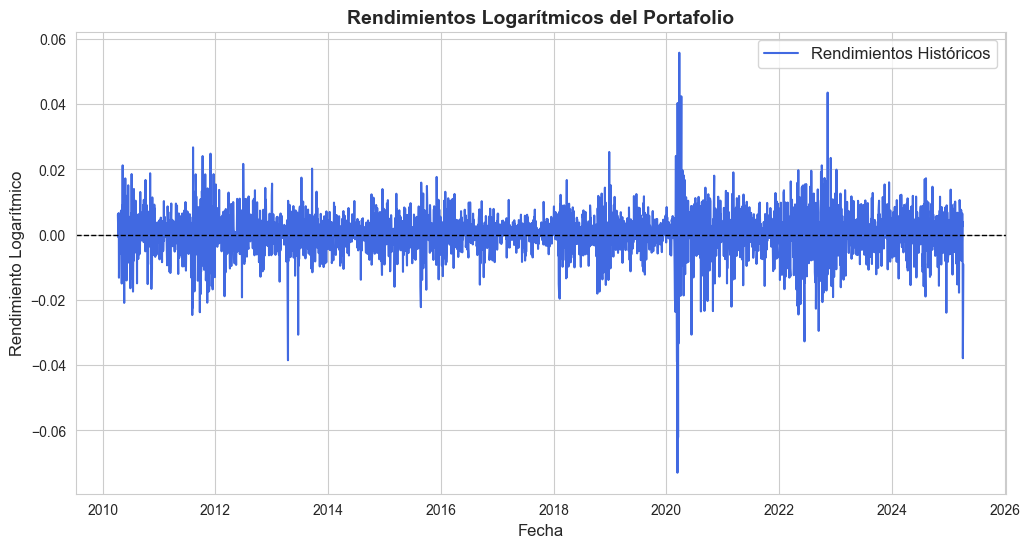

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo limpio

# Graficar los rendimientos históricos del portafolio
plt.plot(historical_returns, color="royalblue", linewidth=1.5, label="Rendimientos Históricos")

# Títulos y etiquetas
plt.title("Rendimientos Logarítmicos del Portafolio", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rendimiento Logarítmico", fontsize=12)

# Agregar línea base en y=0
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Leyenda mejorada
plt.legend(frameon=True, fontsize=12, loc="upper right")

# Mostrar gráfico
plt.show()


In [ ]:
# Permitir que el usuario defina la ventana de días
days = int(input("Ingrese la cantidad de días para la ventana móvil: "))

# Validar que el valor ingresado sea positivo y razonable
if days <= 0 or days > len(historical_returns):
    raise ValueError("El número de días debe estar entre 1 y el total de registros disponibles.")


In [ ]:
# Graficar los rendimientos acumulados
plt.figure(figsize=(12, 6))
plt.plot(range_returns, color="royalblue", linewidth=2, label=f'Rendimiento acumulado ({days} días)')
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)  # Línea en 0 para referencia
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.title(f"Rendimientos Acumulados en Ventanas de {days} días")
plt.legend()
plt.show()

NameError: name 'range_returns' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
def expected_return(weights, log_returns):
    """
    Calcula el rendimiento esperado del portafolio.

    Parámetros:
    - weights: array de los pesos asignados a cada activo en el portafolio.
    - log_returns: DataFrame con los rendimientos logarítmicos históricos de los activos.

    Retorna:
    - El rendimiento esperado del portafolio.
    """
    return np.sum(log_returns.mean() * weights)


def standard_deviation(weights, cov_matrix):
    """
    Calcula la desviación estándar (volatilidad) del portafolio.

    Parámetros:
    - weights: array de los pesos asignados a cada activo en el portafolio.
    - cov_matrix: matriz de covarianza de los rendimientos de los activos.

    Retorna:
    - La desviación estándar del portafolio.
    """
    variance = weights.T @ cov_matrix @ weights  # Calcula la varianza del portafolio
    return np.sqrt(variance)  # Retorna la raíz cuadrada de la varianza (desviación estándar)


In [ ]:
# Crear la matriz de covarianza para todos los activos
cov_matrix = log_returns.cov()

# Mostrar la matriz de covarianza en pantalla
print("📊 Matriz de Covarianza de los Activos:")
print(pd.DataFrame(cov_matrix).round(6).to_string())

📊 Matriz de Covarianza de los Activos:
Ticker       BND       GLD       QQQ       SPY       VTI
Ticker                                                  
BND     0.000009  0.000009  0.000001  0.000000  0.000000
GLD     0.000009  0.000095  0.000007  0.000005  0.000006
QQQ     0.000001  0.000007  0.000170  0.000132  0.000135
SPY     0.000000  0.000005  0.000132  0.000118  0.000121
VTI     0.000000  0.000006  0.000135  0.000121  0.000124


## 📌Paso 4: Generar Múltiples Escenarios Posibles de Precios Futuros
En la metodología de Simulación Monte Carlo, uno de los pasos fundamentales es la generación de escenarios aleatorios que representen posibles caminos futuros del comportamiento del mercado. Estos escenarios se crean con base en las estadísticas históricas del portafolio.

In [ ]:
# 🎲 Función para generar un puntaje Z aleatorio de una distribución normal estándar
def random_z_score():
    return np.random.normal(0, 1)

# 📅 Definir el horizonte de días para la simulación
days = 20

# 📉 Función para calcular la pérdida o ganancia en un escenario simulado
def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, portfolio_expected_return, days):
    """
    Calcula la ganancia o pérdida del portafolio en un escenario simulado.

    Parámetros:
    - portfolio_value: Valor total del portafolio.
    - portfolio_std_dev: Desviación estándar (volatilidad) del portafolio.
    - z_score: Valor aleatorio de una distribución normal estándar.
    - portfolio_expected_return: Rendimiento esperado del portafolio.
    - days: Número de días del horizonte temporal.

    Retorna:
    - Ganancia o pérdida estimada en el portafolio.
    """
    # 📈 Componente de rendimiento esperado
    expected_return_component = portfolio_value * portfolio_expected_return * days

    # 📊 Componente de riesgo basado en volatilidad y distribución normal
    risk_component = portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

    return expected_return_component + risk_component

# 🔍 Prueba de la función con un puntaje Z aleatorio
z_test = random_z_score()
test_scenario = scenario_gain_loss(portfolio_value=1_000_000,
                                   portfolio_std_dev=0.02,
                                   z_score=z_test,
                                   portfolio_expected_return=0.0005,
                                   days=20)

print(f"📌 Escenario simulado de ganancia/pérdida: ${test_scenario:,.2f}")

📌 Escenario simulado de ganancia/pérdida: $109,331.86


In [ ]:
# 🔢 Parámetros del modelo
simulations = 10000  # Número de simulaciones
days = 20  # Horizonte temporal

# 📌 Generar 10,000 valores de z-score de una distribución normal estándar
z_scores = np.random.normal(0, 1, simulations)

# 📉 Calcular las pérdidas o ganancias para cada simulación
scenarioReturn = portfolio_value * portfolio_expected_return * days + \
                 portfolio_value * portfolio_std_dev * z_scores * np.sqrt(days)

# 📊 Mostrar los primeros 10 resultados
print("📈 Muestra de 10 escenarios simulados de ganancia/pérdida:")
print(scenarioReturn[:10])

📈 Muestra de 10 escenarios simulados de ganancia/pérdida:
[-10743.22738377 -33468.52416182   8435.65456128  -1962.91651059
  -6355.75001034 -14206.23852818  -1308.02722509  -7836.95138605
 -10782.31494281  62523.5957907 ]


## 📌 Paso 5: Implementación de los Métodos de Cálculo del VaR
Una vez definidos los pesos del portafolio, el siguiente paso consiste en implementar los diferentes métodos de cálculo del Valor en Riesgo (VaR). Este valor representa la pérdida máxima esperada en un horizonte temporal determinado y con un cierto nivel de confianza.

In [ ]:
# Verificar que hay simulaciones antes de calcular el VaR
if len(scenarioReturn) == 0:
    raise ValueError("No hay datos en 'scenarioReturn'. Verifica las simulaciones.")

# Calcular el VaR al nivel de confianza especificado
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))

# Imprimir resultado con formato claro
print(f"Value at Risk (VaR) al {confidence_interval:.0%} de confianza: ${VaR:,.2f}")


Value at Risk (VaR) al 99% de confianza: $61,416.22


## 📌 Paso 6: Visualización de los Resultados mediante Gráficos
Una vez calculado el VaR utilizando los distintos métodos, es fundamental visualizar los resultados para interpretar de forma clara y rápida el riesgo del portafolio.

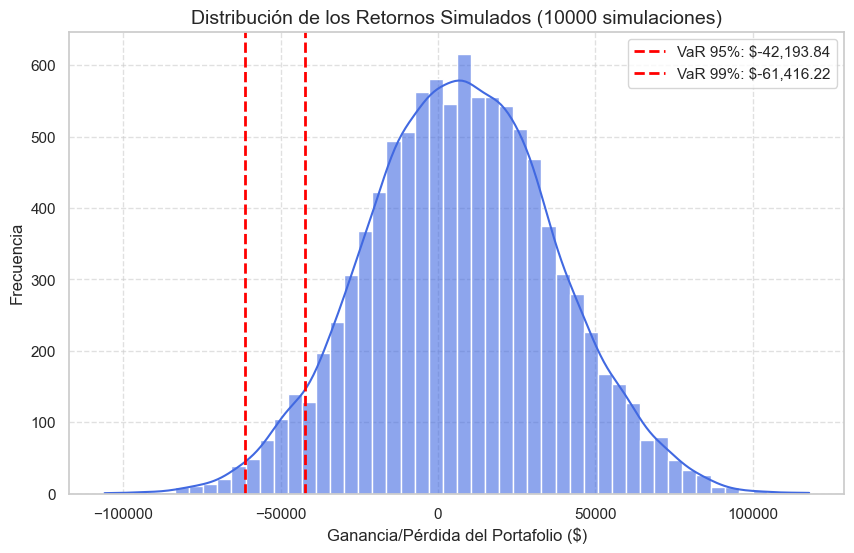

In [ ]:
 #Crear el histograma de las simulaciones
plt.figure(figsize=(10, 6))
sns.histplot(scenarioReturn, bins=50, kde=True, color="royalblue", alpha=0.6)

# 📍 Agregar líneas para los percentiles clave
percentiles = [5, 1]  # VaR al 95% y 99%
for p in percentiles:
    VaR = np.percentile(scenarioReturn, p)
    plt.axvline(VaR, color='red', linestyle='dashed', linewidth=2, label=f'VaR {100 - p}%: ${VaR:,.2f}')

# 🎨 Personalizar el gráfico
plt.title(f"Distribución de los Retornos Simulados ({simulations} simulaciones)", fontsize=14)
plt.xlabel("Ganancia/Pérdida del Portafolio ($)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 📊 Mostrar el gráfico
plt.show()